# Homework 3
- Student: Aleksandra Kocot
 - [Git Hub page with the Homework questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

#### Reading the data

In [ ]:
!wget -O car_price_data.csv https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [3]:
df_raw = pd.read_csv("car_price_data.csv")

In [4]:
list(df_raw.columns)

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [5]:
columns = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg'
]

In [6]:
df_raw = df_raw[columns + ["MSRP"]]

### Data preparation

In [7]:
df_raw.columns = df_raw.columns.str.replace(' ', '_').str.lower()

In [8]:
df_raw.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
df_raw = df_raw.fillna(0)

In [10]:
df_raw.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
df_raw = df_raw.rename(columns={"msrp":"price"})

In [12]:
df_raw.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [13]:
df_raw.tail()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920
11913,Lincoln,Zephyr,2006,221.0,6.0,AUTOMATIC,Sedan,26,17,28995


## Question 1
What is the most frequent observation (mode) for the column transmission_type?
- <b>AUTOMATIC</b>
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [14]:
df_raw.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [15]:
df_raw.transmission_type.value_counts(normalize=True)

transmission_type
AUTOMATIC           0.693806
MANUAL              0.246349
AUTOMATED_MANUAL    0.052543
DIRECT_DRIVE        0.005708
UNKNOWN             0.001595
Name: proportion, dtype: float64

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?
- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- <b>highway_mpg and city_mpg</b>

In [16]:
df_raw.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [17]:
# df_raw["year"] = df_raw["year"].astype(str)

In [18]:
df_raw.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [19]:
df_corr = df_raw.drop(columns = ["make","model","transmission_type","vehicle_style","price","year"]).corr()

In [20]:
df_corr.abs()[df_corr<1].max().sort_values(ascending=False)

highway_mpg         0.886829
city_mpg            0.886829
engine_hp           0.774851
engine_cylinders    0.774851
dtype: float64

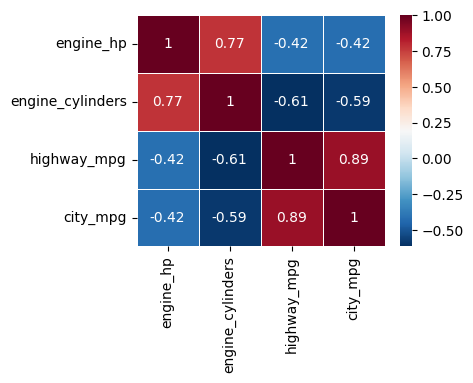

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(
    df_corr,
    annot=True,
    linewidths=.5, 
    cmap="RdBu_r"
    );

##### Make price binary
Now we need to turn the price variable from numeric into a binary format.<br>
Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [22]:
df = df_raw.copy()

In [23]:
price_avg = df["price"].mean()
price_avg

40594.737032063116

In [24]:
df["above_average"] = (df["price"] > price_avg).astype(int)

#### Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.<br>
Make sure that the target value (median_house_value) is not in your dataframe.

In [25]:
list(df.columns)

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [26]:
df = df.drop(columns="price", axis=1)

In [27]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

In [29]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [30]:
df_val

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
1918,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31,23,0
9951,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24,17,1
5486,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31,22,0
292,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24,17,0
3644,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15,11,0
...,...,...,...,...,...,...,...,...,...,...
4385,Ford,Explorer Sport,2003,203.0,6.0,AUTOMATIC,2dr SUV,19,14,0
7339,Subaru,Outback,2016,175.0,4.0,AUTOMATIC,4dr SUV,33,25,0
9806,GMC,Sonoma,2003,190.0,6.0,MANUAL,Extended Cab Pickup,17,12,0
11162,Aston Martin,V8 Vantage,2015,430.0,8.0,AUTOMATED_MANUAL,Coupe,21,14,1


In [31]:
df_test

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3995,GMC,Envoy XL,2005,275.0,6.0,AUTOMATIC,4dr SUV,18,13,0
7474,Volkswagen,Passat,2016,170.0,4.0,AUTOMATIC,Sedan,38,25,0
7300,Honda,Odyssey,2016,248.0,6.0,AUTOMATIC,Passenger Minivan,28,19,0
3148,Chevrolet,Cruze,2015,138.0,4.0,MANUAL,Sedan,36,25,0
747,Volvo,740,1991,162.0,4.0,AUTOMATIC,Sedan,20,17,0
...,...,...,...,...,...,...,...,...,...,...
267,Nissan,350Z,2007,306.0,6.0,MANUAL,Convertible,24,17,0
4320,Ford,Expedition,2016,365.0,6.0,AUTOMATIC,4dr SUV,20,15,1
5799,Acura,ILX,2015,150.0,4.0,AUTOMATIC,Sedan,35,24,0
6080,Volkswagen,Jetta SportWagen,2014,170.0,5.0,MANUAL,Wagon,33,23,0


In [32]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [34]:
del df_train["above_average"] 
del df_val["above_average"]
del df_test["above_average"] 

## Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset.<br> 
Use the training set only.<br>
Round the scores to 2 decimals using round(score, 2).<br>
Which of these variables has the lowest mutual information score?
- make
- model
- <b>transmission_type</b>
- vehicle_style

In [35]:
categorical = ['make','model','year','transmission_type','vehicle_style']

In [36]:
mi_res = {}
for cat_col in categorical:
    mi_score = mutual_info_score(y_train, df_train[cat_col])
    mi_res[cat_col] = mi_score
    print(f"{cat_col}: {mi_score}")

make: 0.23976875439118345
model: 0.46234389209653004
year: 0.07154435155401667
transmission_type: 0.020957541896301862
vehicle_style: 0.0841430195677944


In [37]:
df_mi_res = pd.Series(mi_res)

In [38]:
df_mi_res.sort_values()

transmission_type    0.020958
year                 0.071544
vehicle_style        0.084143
make                 0.239769
model                0.462344
dtype: float64

## Question 4
Now let's train a logistic regression<br>
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.<br>
Fit the model on the training dataset.<br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:<br>
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)<br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.<br>
Options:
- 0.60
- 0.72
- 0.84
- <b>0.95</b> (0.93)

#### One Hot Encoding

##### Using OneHotEncoder - to test it - below with DictVectorizer as in Lectures

In [39]:
enc = OneHotEncoder(handle_unknown='ignore')

In [40]:
df_train.make

0        Mitsubishi
1               Kia
2       Lamborghini
3         Chevrolet
4           Pontiac
           ...     
7143         Toyota
7144      Chevrolet
7145        Hyundai
7146     Mitsubishi
7147           Ford
Name: make, Length: 7148, dtype: object

In [41]:
enc.fit(df_train.make.values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [36]:
enc.transform(df_train.make.values.reshape(-1, 1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
enc.fit(df_train)

OneHotEncoder(handle_unknown='ignore')

In [38]:
ohe = enc.transform(df_train).toarray()

In [39]:
len(ohe[0])

1431

##### - OneHotEncoder encode all the variables - also those numeric.

#### Vectorizing

In [42]:
train_dict = df_train.to_dict(orient='records')

In [43]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [44]:
X_train[0][1:30]

array([  6., 225.,  19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [45]:
len(X_train[0])

943

In [46]:
list(dv.get_feature_names_out())

['city_mpg',
 'engine_cylinders',
 'engine_hp',
 'highway_mpg',
 'make=Acura',
 'make=Alfa Romeo',
 'make=Aston Martin',
 'make=Audi',
 'make=BMW',
 'make=Bentley',
 'make=Bugatti',
 'make=Buick',
 'make=Cadillac',
 'make=Chevrolet',
 'make=Chrysler',
 'make=Dodge',
 'make=FIAT',
 'make=Ferrari',
 'make=Ford',
 'make=GMC',
 'make=Genesis',
 'make=HUMMER',
 'make=Honda',
 'make=Hyundai',
 'make=Infiniti',
 'make=Kia',
 'make=Lamborghini',
 'make=Land Rover',
 'make=Lexus',
 'make=Lincoln',
 'make=Lotus',
 'make=Maserati',
 'make=Maybach',
 'make=Mazda',
 'make=McLaren',
 'make=Mercedes-Benz',
 'make=Mitsubishi',
 'make=Nissan',
 'make=Oldsmobile',
 'make=Plymouth',
 'make=Pontiac',
 'make=Porsche',
 'make=Rolls-Royce',
 'make=Saab',
 'make=Scion',
 'make=Spyker',
 'make=Subaru',
 'make=Suzuki',
 'make=Tesla',
 'make=Toyota',
 'make=Volkswagen',
 'make=Volvo',
 'model=1 Series',
 'model=100',
 'model=124 Spider',
 'model=190-Class',
 'model=2',
 'model=2 Series',
 'model=200',
 'model=20

##### - DictVectorizer encode only vategorical variables and leave numeric ones as they are!

#### Training Logistic Regression

In [47]:
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(acc)

0.9345362987830466


In [49]:
acc_rounded = round(acc,2)
acc_rounded

0.93

## Question 5
Let's find the least useful feature using the feature elimination technique.<br>
Train a model with all these features (using the same parameters as in Q4).<br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.<br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.<br><br>
Which of following feature has the smallest difference?
- year
- engine_hp
- <b>transmission_type</b>?
- city_mpg

<br>Note: the difference doesn't have to be positive

In [50]:
features = df_train.columns
accuracies = {}

In [55]:
for f in features:
    df_train_ex = df_train.drop(columns=f)
    train_dict = df_train_ex.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    df_val_ex = df_val.drop(columns=f)
    val_dict = df_val_ex.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    accuracy = np.round(accuracy_score(y_val, y_pred),4)
    accuracies[f] = accuracy
    print(f"Excluded feature: {f}, accuracy: {round(accuracy,4)}")

Excluded feature: make, accuracy: 0.9425
Excluded feature: model, accuracy: 0.9165
Excluded feature: year, accuracy: 0.9484
Excluded feature: engine_hp, accuracy: 0.9211
Excluded feature: engine_cylinders, accuracy: 0.9425
Excluded feature: transmission_type, accuracy: 0.9421
Excluded feature: vehicle_style, accuracy: 0.9316
Excluded feature: highway_mpg, accuracy: 0.9417
Excluded feature: city_mpg, accuracy: 0.9467


In [56]:
results = pd.Series(accuracies)

In [57]:
df_results = pd.DataFrame({"accuracies":accuracies,"diff":acc - pd.Series(accuracies)})

In [58]:
df_results.sort_values(by="diff", ascending=False)

,accuracies,diff
model,0.9165,0.018036
engine_hp,0.9211,0.013436
vehicle_style,0.9316,0.002936
highway_mpg,0.9417,-0.007164
transmission_type,0.9421,-0.007564
make,0.9425,-0.007964
engine_cylinders,0.9425,-0.007964
city_mpg,0.9467,-0.012164
year,0.9484,-0.013864


## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.
<br>Which of these alphas leads to the best RMSE on the validation set?
    - <b>0</b>
    - 0.01
    - 0.1
    - 1
    - 10

Note: If there are multiple options, select the smallest alpha.

In [51]:
df_full, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [52]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

Note: We increase the max_iter because of the Warning:
- "The max_iter was reached which means the coef_ did not converge"
- However, this change increase the computation time from seconds to minutes, so the highest tried is 2000.

In [53]:
rmses = {}
for a in [0, 0.01, 0.1, 1, 10]:
    print(f"Alpha: {a}")
    model = Ridge(alpha=a, solver="sag", max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(rmse)
    rmses[a] = np.round(rmse,3)

Alpha: 0


/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4692045485581754
Alpha: 0.01


/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4692051229685141
Alpha: 0.1


/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4692102924049376
Alpha: 1


/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4692619637786512
Alpha: 10
0.46977636415582497


/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [54]:
pd.Series(rmses)

0.00     0.469
0.01     0.469
0.10     0.469
1.00     0.469
10.00    0.470
dtype: float64